## Exercise 1: Playing with Boolean variables 

Implement the following functions:
- a function called `my_and()` that implements the logical `and`. This function should take two Boolean variables `x1` and `x2` as inputs and return the result of the logical statement `x1 and x2`. We recall the truth table of the `and` operator: `x1 and x2` is True when at the same time `x1` and `x2` are themselves true.
- a function called `my_or()` that implements the logical `or` operator. This function should take two Boolean variables `x1` and `x2` as inputs and return the result of the logical statement `x1 or x2`. We recall the truth table of the `or` operator: `x1 or x2` is True when either `x1`, `x2`, or both, are themselves true.
- The Boolean expression `not A` is the logical negation of `A`, meaning that if `A` is True, then `not A` is False, and viceversa. You will recall that the logical statement "A implies B" is logically equivalent to "B or not A" (their truth tables are equivalent). With this, build a Python function called `my_implies()`that takes two Boolean variables `A` and `B` as inputs, and returns whether the logical statement `A implies B` is True or False.
- We say that an integer $a$ divides an integer $m$, if $m=ka$ for some integer $k$. Implement a Python function called `my_divide()` that takes two integers $a$ and $m$ as inputs and returns $k$ if $a$ divides $m$, and `False` otherwise.
- Test all previous functions above with suitable entries, and check that the results are as expected and that you understand the logic.


In [2]:
def my_and(x1, x2):
    return (x1 and x2)

print(my_and(True, True))
print(my_and(True, False))
print(my_and(False, True))
print(my_and(False, False))

True
False
False
False


In [3]:
def my_or(x1, x2):
    return (x1 or x2)

print(my_or(True, True))
print(my_or(True, False))
print(my_or(False, True))
print(my_or(False, False))

True
True
True
False


In [4]:
def my_implies(A, B):
    return (B or (not A))

print(my_implies(True, False))
print(my_implies(True, True))
print(my_implies(False, False))
print(my_implies(False, True))

False
True
True
True


In [7]:
def my_divide(a, m):
    if m % a == 0:
        return m/a
    else:
        return False

print(my_divide(2, 7))
print(my_divide(2, 8))

False
4.0


## Exercise 2: The `if`-`elif`-`else` conditional : the Collatz function


- Write a Python function `f(x)` that computes the function $f:\mathbb Z\to\mathbb Z$ given by 
$$f(x)=\begin{cases}3x+1&\text{if $x$ is odd,}\\ x/2&\text{if $x$ is even.}\end{cases}$$ 
The function should also print the statement 'not an integer' if the input is a floating point.
- Test this function by computing $f(6)$ and $f(1.5)$. Print $f(n)$ for $1\leq n\leq 20$. (Note that the output should be integer, not floating point!) Plot the resulting "sequence trajectory" as a scatter plot

3.0
not an integer


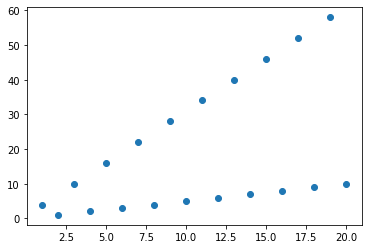

In [15]:
import matplotlib.pyplot as plt

def f_x(x):
    if x % 2 == 0:
        return x/2
    elif (x + 1) % 2 == 0:
        return 3*x + 1
    else:
        print("not an integer")
        
print(f_x(6))
f_x(1.5)

x = [i for i in range(1, 21)]
y = [f_x(i) for i in x]

plt.scatter(x, y)

## Exercise 3: Recursive functions: Fibonacci

The Fibonacci sequence $F=(1,1,3,5,8,13,21,...)$ is generated by the following rules: $F_0=1, F_1=1$, and $F_n=F_{n-1}+F_{n-2},$ for $n>1$ (note that, for convenience, the running index $n$ starts at zero instead of 1, in order to make this closer to the Python convention where index starts at zero.

There are different ways of implementing a function that computes $F(n)$. A very intuitive way is to use loops, something that we will learn in the following weeks. Since we haven't learned loops yet, we will use another technique: recursion. 

Check on the lecture notes how we constructed a recursive function that computes the factorial number. Using that as inspiration, define a Python function called `recursive_Fibonacci()` that takes an integer $n$ as input and returns the $n-th$ Fibonacci number (where, again, we are using the convention that the first element in $F$ is $F_0$). Don't forget to print comments inside the function, so when you run it, you can see the flow. Test it by printing `recursive_Fibonacci(5)`.

In [20]:
def recursive_Fibonacci(n):
    if n < 0:
        return None
    elif n == 0 or n == 1:
        return 1
    elif n > 1:
        return recursive_Fibonacci(n-1) + recursive_Fibonacci(n-2)

print(recursive_Fibonacci(5))

8


## Exercise 4: Playing with vectors and matrices

Define two $3\times3$ matrices $A$ and $B$ and a $3\times1$ vector $C$ such that
$$A=\left[\begin{matrix}
1&1&2\\ -1&3&1\\ 0&5&2
\end{matrix}\right], \  B=\left[\begin{matrix}
1&0&2\\ 0&1&0\\ 0&0&1
\end{matrix}\right], \ C=\left[\begin{matrix}
1\\ 1\\ 2
\end{matrix}\right]$$

Print the matrix multiplication of $A$ and $B$, of $B$ and $A$, the norm of $C$, and the matrix multiplication of $A$ and $C$.



In [24]:
import numpy as np

A = np.array([[1,1,2], [-1,3,1], [0,5,2]])
B = np.array([[1,0,2], [0,1,0], [0,0,1]])
C = np.array([[1], [1], [2]])

print(A@B)
print(B@A)
print(np.linalg.norm(C))
print(A@C)

[[ 1  1  4]
 [-1  3 -1]
 [ 0  5  2]]
[[ 1 11  6]
 [-1  3  1]
 [ 0  5  2]]
2.449489742783178
[[6]
 [4]
 [9]]


## Exercise 5: Elementary matrices

[Elementary matrices](https://en.wikipedia.org/wiki/Elementary_matrix#Elementary_row_operations) are matrices which, when matrix-multiplied to a matrix of interest $A$, have the effect of performing elementary row operations in $A$. For instance, when we matrix-multiply an elementary matrix and $A$, the resulting matrix can be seen as a simply modification of $A$ where either of the following happens:
1. $A$ was modified by adding $k$ times row $j$ of $A$ to row $i$ of $A$
2. $A$ was modified by multiply row $i$ of $A$ by scalar $s$
3. $A$ was modified by switching rows $i$ and $j$ in $A$

For example, if $A$ is a $3\times3$ matrix and we want to add s times row 2 to row 0, then the elementary matrix for this is
$$E_1=\left[\begin{matrix}
1&0&s\\ 0&1&0\\ 0&0&1
\end{matrix}\right]$$

To multiply row 1 by $s$ is done by using the following elementary matrix
$$E_2=\left[\begin{matrix}
1&0&0\\ 0&s&0\\ 0&0&0
\end{matrix}\right]$$

And to switch rows 1 and  2 is done with
$$E_3=\left[\begin{matrix}
1&0&0\\ 0&0&1\\ 0&1&0
\end{matrix}\right]$$










- **5.1** Start by veryfing the above with an example. To do that, define the matrix $A$ as
$$A=\left[\begin{matrix}
1&1&2\\ -1&3&1\\ 0&5&2
\end{matrix}\right],$$
and check that matrix-multiplying (`E@A`) in each case has the intended effect.

In [25]:
s = 2

E_1 = np.array([[1,0,s], [0,1,0], [0,0,1]])
E_2 = np.array([[1,0,0], [0,s,0], [0,0,0]])
E_3 = np.array([[1,0,0], [0,0,1], [0,1,0]])
A = np.array([[1,1,2], [-1,3,1], [0,5,2]])

print(E_1@A)
print(E_2@A)
print(E_3@A)

[[ 1 11  6]
 [-1  3  1]
 [ 0  5  2]]
[[ 1  1  2]
 [-2  6  2]
 [ 0  0  0]]
[[ 1  1  2]
 [ 0  5  2]
 [-1  3  1]]



- **5.2** Then, define a Python function called `add_row()` that implements $E_1$. The function should take four arguments as inputs: the matrix $A$, a scalar $s$, and two row indices $i,j$ (remind that Python index starts at zero, not one!). Concretely, `add_row(A,s,i,j)` is a function that modifies $A$ by adding $s$ times row $j$ of $A$ to row $i$ of $A$. As a test, use the function to check that adding double the second row to the first row of
$$A=\left[\begin{matrix}
2&1\\ 3&4
\end{matrix}\right]$$
gives
$$A=\left[\begin{matrix}
8&9\\ 3&4
\end{matrix}\right]$$

In [ ]:
def add_row(A, s, i ,j):
    

- **5.3** Likewise, implement a function `scale_row()` that implements $E_2$, and `switch_row()` that implements $E_3$. As a test, use the functions to check that multiplying the second row by $-0.5$ for
$$A=\left[\begin{matrix}
2&1\\ 3&4
\end{matrix}\right]$$
gives
$$A=\left[\begin{matrix}
2&1\\ -1.5&-2
\end{matrix}\right],$$
and that switching the first and second rows of 
$$A=\left[\begin{matrix}
2&1\\ 3&4
\end{matrix}\right]$$
gives
$$A=\left[\begin{matrix}
3&4\\ 2&1
\end{matrix}\right]$$

## Exercise 6: Random linear systems

- Define a $100\times100$ real-valued matrix $A$ with entries randomly chosen from a normal distribution, and a real-valued vector of dimension 100 with also randomly chosen entries from the same distribution.
- Compute the eigenvalues of $A$ , and plot them in the complex plane.
- Compute the inverse and to solve the linear system $Ax=b$. Do you foresee any problem with this? Check if the result is accurate. 
